In [110]:
import blockify
import matplotlib.pyplot as plt

plt.style.use("dark_background")

import importlib
importlib.reload(blockify)



To optimally "split" an image into two panes (left-right or up-down):

- Regardless of where you choose to split it, the optimal color for each pane is simply the average color over the pixels in that pane.
- So the problem reduces to choosing the split point.
- Moreover, the loss on each side of the split point is just the average squared deviation from the average among those pixels, i.e. the standard deviation.
- Therefore, the problem reduces to choosing the split point that minimizes the standard deviation on each side, weighted by the side of the pane.

Now suppose we do this recursively, so first we compute an optimal left-right split, then split one of the new panes up and down, etc.

This reduces the image to a Mondrian-style set of rectangular partitions. The partitions can be encoded in a very small amount of space.

This is not necessarily a very good *image compression algorithm* (except for very specific kinds of images); rather it is an artistic technique that can be used in web design to serve a small, aesthetically appealing substitute while the page is loading and fetching the actual image.

Both test images are by <a href="https://unsplash.com/@lvenfoto?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Zhang liven</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

In [112]:
teapot_blockified = blockify.blockify_image(
    "./test_images/teapot.jpg",
    250,
    alternator_type="strict",
    strategy="largest_pane"
)
# Returns a BlockifiedImage instance with methods .to_array(), .to_png(), .to_svg()
# Also stores a reference .image_array to the original image
teapot_blockified

Blockified image instance with 250 panes
Original image dimensions: 5760×3840×3
Alternator type: strict
Strategy: largest_pane

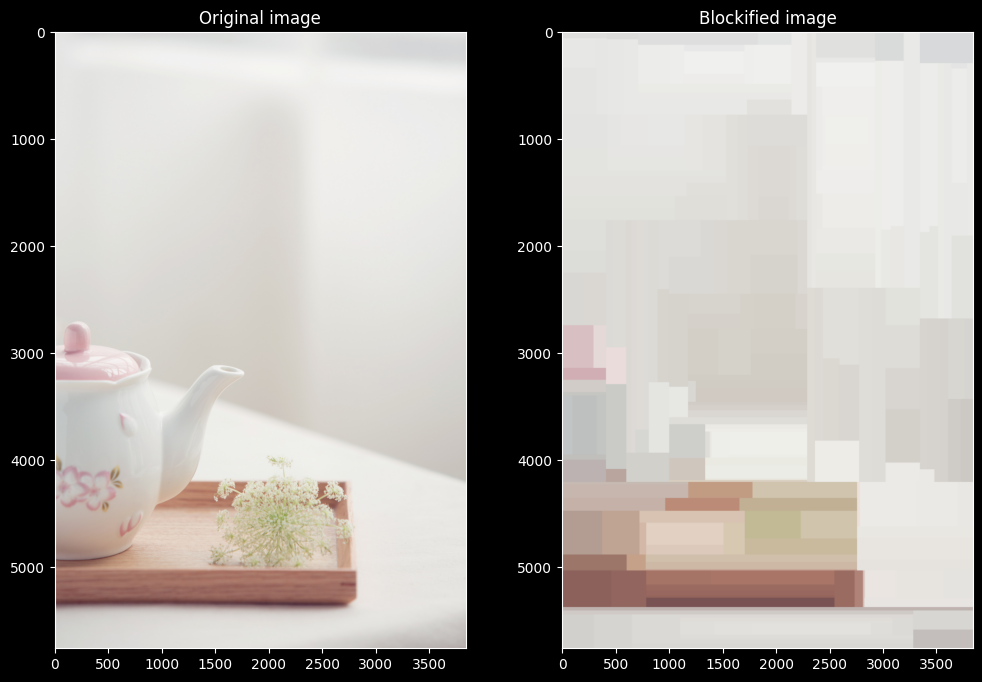

In [113]:
def plot_comparison(blockified_image):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))
    ax[0].imshow(blockified_image.image_array)
    ax[0].set_title("Original image")
    ax[1].imshow(blockified_image.to_array())
    ax[1].set_title("Blockified image")

plot_comparison(teapot_blockified)
plt.savefig("./test_images/teapot_blockified_comparison.png", bbox_inches="tight")

Can randomize horizontal/vertical splits instead

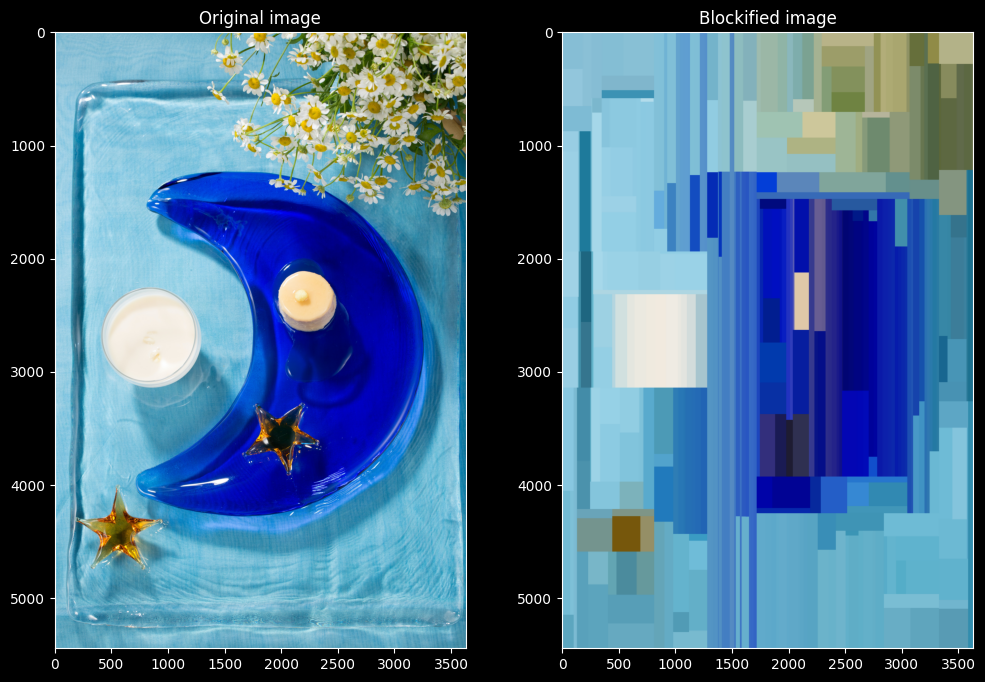

In [114]:
sculpture_blockified = blockify.blockify_image(
    "./test_images/sculpture.jpg", 
    350,
    alternator_type="randomized",
    strategy="largest_pane"
)
plot_comparison(sculpture_blockified)
plt.savefig("./test_images/sculpture_blockified_comparison.png", bbox_inches="tight")